# Signal processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import os
import scipy
import scipy.signal as signal


In [2]:
data_date = "2025_03_24"
data_path = "F:\\interferometry_data\\" + data_date

file_list = os.listdir(data_path)
number_file = len(file_list)

file_list.sort()
file_list

['2025_03_24_10_00_06_9_PSD.csv',
 '2025_03_24_10_00_16_9_PSD.csv',
 '2025_03_24_10_00_27_0_PSD.csv',
 '2025_03_24_10_00_37_0_PSD.csv',
 '2025_03_24_10_00_47_0_PSD.csv',
 '2025_03_24_10_00_57_1_PSD.csv',
 '2025_03_24_10_01_07_2_PSD.csv',
 '2025_03_24_10_01_17_2_PSD.csv',
 '2025_03_24_10_01_27_2_PSD.csv',
 '2025_03_24_10_01_37_3_PSD.csv',
 '2025_03_24_10_01_47_3_PSD.csv',
 '2025_03_24_10_01_57_4_PSD.csv',
 '2025_03_24_10_02_07_4_PSD.csv',
 '2025_03_24_10_02_17_5_PSD.csv',
 '2025_03_24_10_02_27_5_PSD.csv',
 '2025_03_24_10_02_37_6_PSD.csv',
 '2025_03_24_10_02_47_6_PSD.csv',
 '2025_03_24_10_02_57_7_PSD.csv',
 '2025_03_24_10_03_07_7_PSD.csv',
 '2025_03_24_10_03_17_8_PSD.csv',
 '2025_03_24_10_03_27_8_PSD.csv',
 '2025_03_24_10_03_37_9_PSD.csv',
 '2025_03_24_10_03_47_9_PSD.csv',
 '2025_03_24_10_03_58_0_PSD.csv',
 '2025_03_24_10_04_08_0_PSD.csv',
 '2025_03_24_10_04_18_1_PSD.csv',
 '2025_03_24_10_04_28_1_PSD.csv',
 '2025_03_24_10_04_38_2_PSD.csv',
 '2025_03_24_10_04_48_2_PSD.csv',
 '2025_03_24_1

In [3]:
Frequency =  np.loadtxt(os.path.join(data_path, file_list[0]), delimiter=',')[:,0]

print(Frequency)

[608.8    608.8047 608.8094 608.8141 608.8188 608.8234 608.8281 608.8328
 608.8375 608.8422 608.8469 608.8516 608.8562 608.8609 608.8656 608.8703
 608.875  608.8797 608.8844 608.8891 608.8938 608.8984 608.9031 608.9078
 608.9125 608.9172 608.9219 608.9266 608.9312 608.9359 608.9406 608.9453
 608.95   608.9547 608.9594 608.9641 608.9688 608.9734 608.9781 608.9828
 608.9875 608.9922 608.9969 609.0016 609.0062 609.0109 609.0156 609.0203
 609.025  609.0297 609.0344 609.0391 609.0438 609.0484 609.0531 609.0578
 609.0625 609.0672 609.0719 609.0766 609.0812 609.0859 609.0906 609.0953
 609.1    609.1047 609.1094 609.1141 609.1188 609.1234 609.1281 609.1328
 609.1375 609.1422 609.1469 609.1516 609.1562 609.1609 609.1656 609.1703
 609.175  609.1797 609.1844 609.1891 609.1938 609.1984 609.2031 609.2078
 609.2125 609.2172 609.2219 609.2266 609.2312 609.2359 609.2406 609.2453
 609.25   609.2547 609.2594 609.2641 609.2688 609.2734 609.2781 609.2828
 609.2875 609.2922 609.2969 609.3016 609.3062 609.3

In [4]:
# Get time form name file
time_list = np.zeros(number_file)
time1_list = ["" for i in range(number_file)]

for file in file_list:
    # Split the string into its components
    components = file.split("_")
    # Extract the date and time components
    date_str = f"{components[0]}-{components[1]}-{components[2]}"
    time_str = f"{components[3]}:{components[4]}:{components[5]}"
    time1_list[file_list.index(file)] = time_str
    # Combine the date and time components into a single string
    dateTime_str = f"{date_str} {time_str}"
    
    # Parse the string into a datetime object
    dateTime = datetime.datetime.strptime(dateTime_str, '%Y-%m-%d %H:%M:%S')
    time_list[file_list.index(file)] = dateTime.timestamp()

print(time_list.max())
print(time_list.min())

1742799596.0
1742785206.0


In [5]:
power_list = np.zeros(number_file)
data_matrix = np.zeros((len(Frequency), number_file))

for file in file_list:
    data = np.loadtxt(os.path.join(data_path, file), delimiter=',')
    data_matrix[:, file_list.index(file)] = data[:, 1]
    power_list[file_list.index(file)] = data[:, 1].mean()

power_list

array([-32.06571739, -32.06385083, -32.06713242, ..., -32.06779323,
       -32.06847017, -32.07068478])

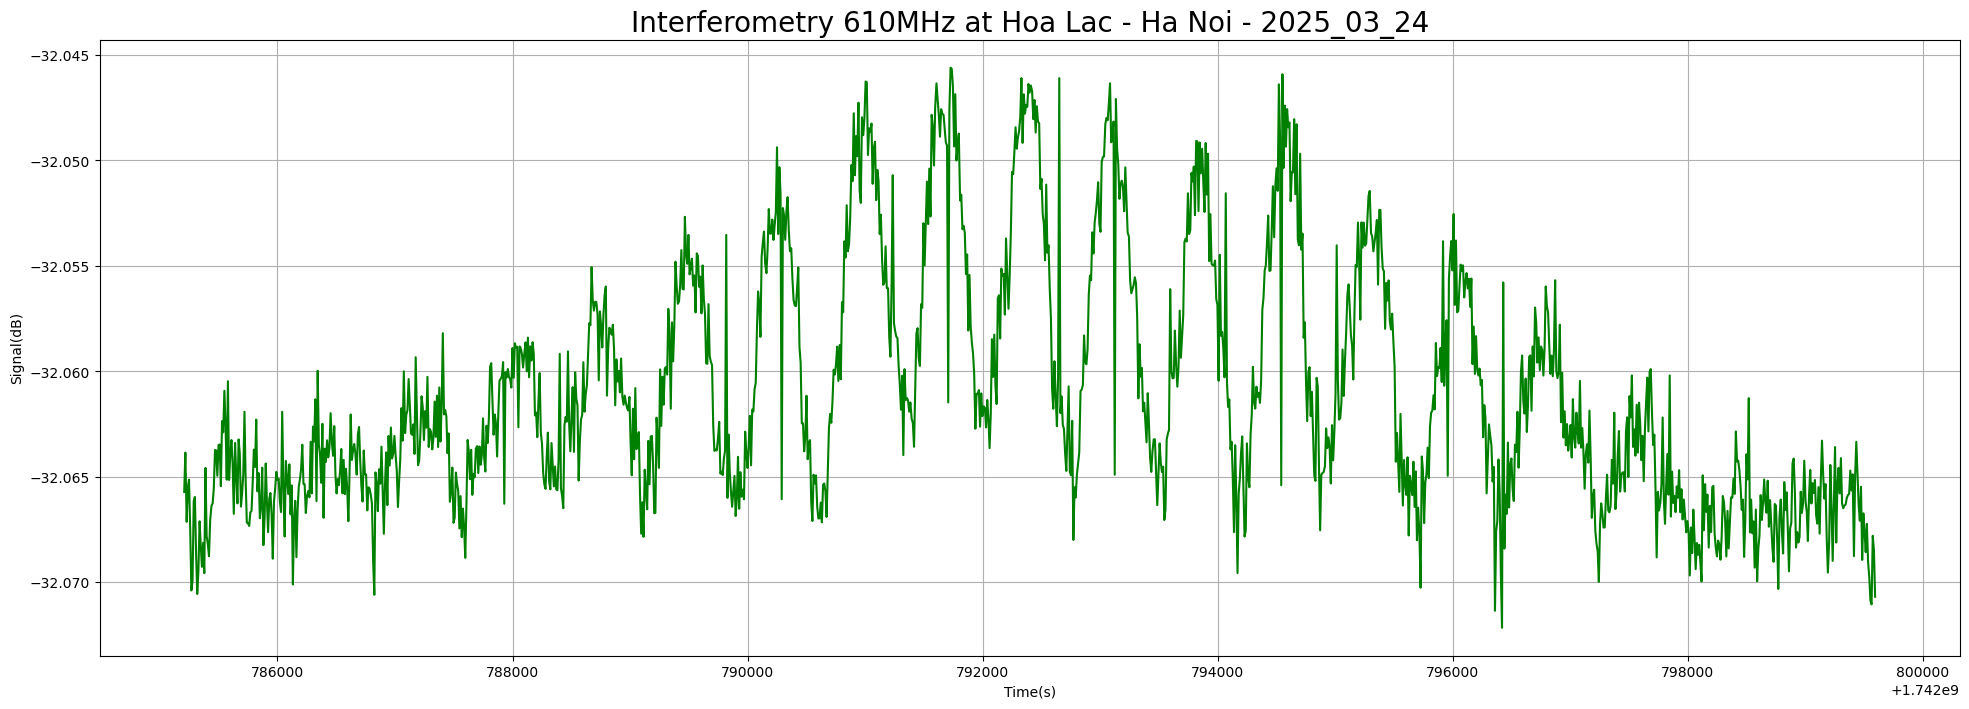

In [6]:
fig, ax = plt.subplots(1, 1, figsize = [24, 8])
ax.set_title(f'Interferometry 610MHz at Hoa Lac - Ha Noi - {data_date}', fontsize=20)
ax.set(xlabel = 'Time(s)', ylabel = 'Signal(dB)')
ax.grid()
ax.plot(time_list, power_list, color = 'green', linestyle = '-')
plt.show()

In [7]:
def remove_spike(x, threshold=3, window_size=11):
    """
    Remove spikes from the x-axis.

    Parameters:
    x (numpy array): The x-axis to remove spikes from.
    threshold (float): The threshold to define spikes. Default value is 3.
    window_size (int): The size of the window to calculate the average. Default value is 11.

    Returns:
    x_smooth (numpy array): The x-axis with spikes removed.
    """
    # Calculate the mean of x
    x_mean = np.mean(x)

    # Calculate the standard deviation of x
    x_std = np.std(x)

    # Finding the indices of spikes
    spike = np.abs(x - x_mean) > threshold * x_std

    # Removing the spike
    x_smooth = np.copy(x)
    x_smooth[spike] = np.mean(x[~spike])

    # Using linear interpolation
    # x_smooth[spike] = np.interp(np.where(spike)[0], np.where(~spike)[0], x[~spike])           # Bad

    # Using Savitzky-Golay filter
    # x_smooth = signal.savgol_filter(x_smooth, window_size, 3)                                 # Dependence on Threshold

    # Using convolution
    x_smooth = np.convolve(x, np.ones(window_size)/window_size, mode='same')                    # Good

    return x_smooth


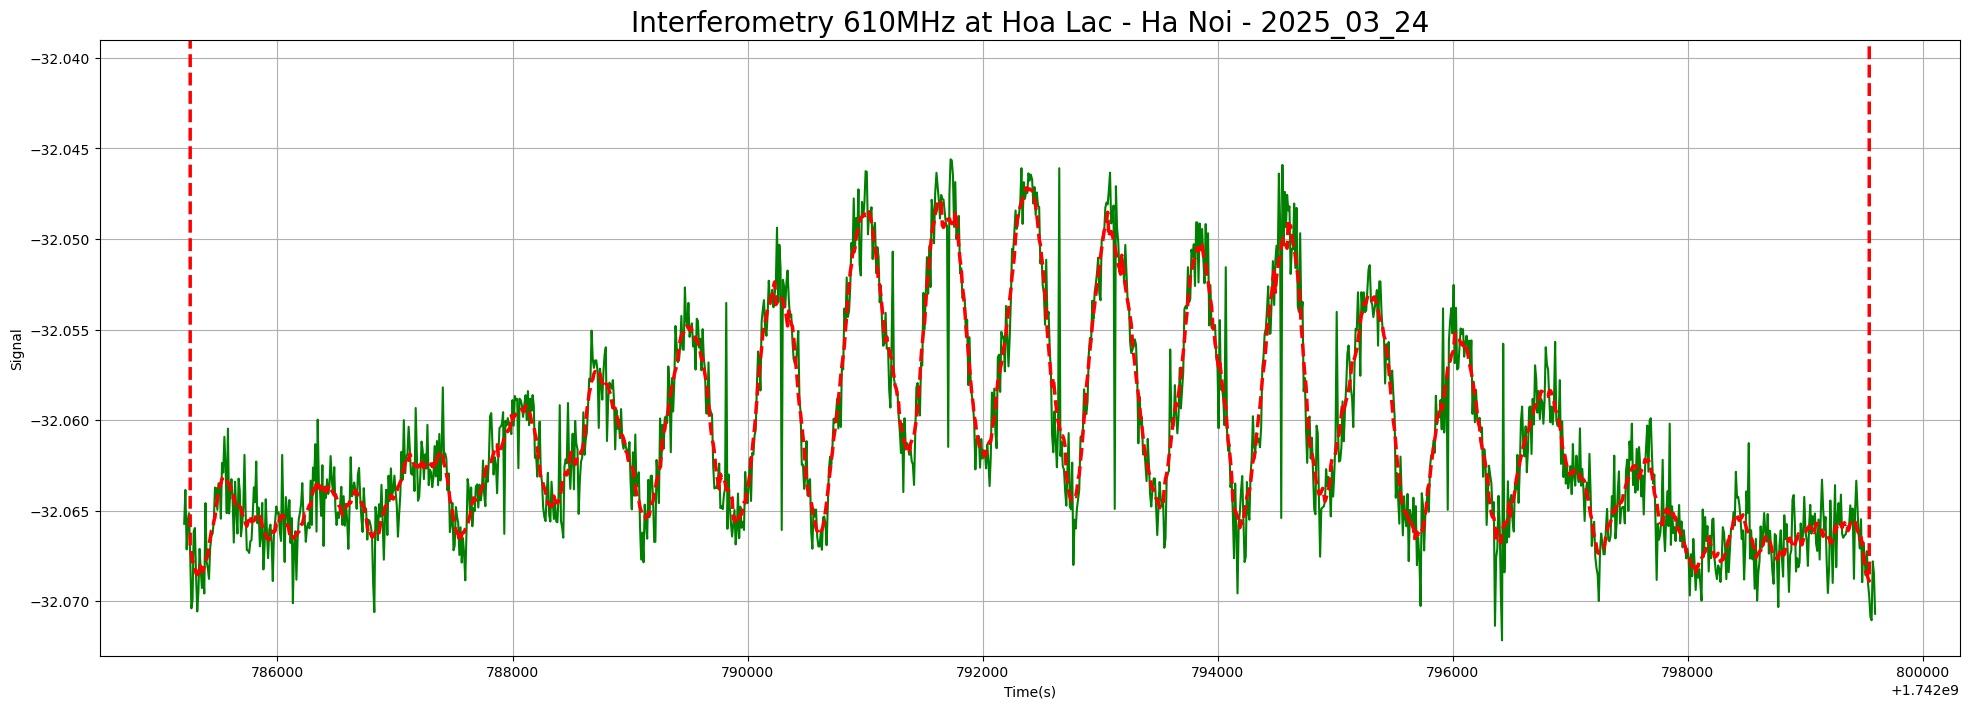

In [8]:
power_1 = remove_spike(power_list, threshold=3, window_size=11)

fig, ax_1 = plt.subplots(1, 1, figsize = [24, 8])
ax_1.set_title(f'Interferometry 610MHz at Hoa Lac - Ha Noi - {data_date}', fontsize=20)
ax_1.set(xlabel = 'Time(s)', ylabel = 'Signal')
ax_1.plot(time_list, power_list, color = 'green', linestyle = '-')
ax_1.plot(time_list, power_1, color = 'red', linestyle = '--', linewidth = 2.5)
ax_1.set_ylim(-32.073, -32.039)
ax_1.grid()
plt.show()


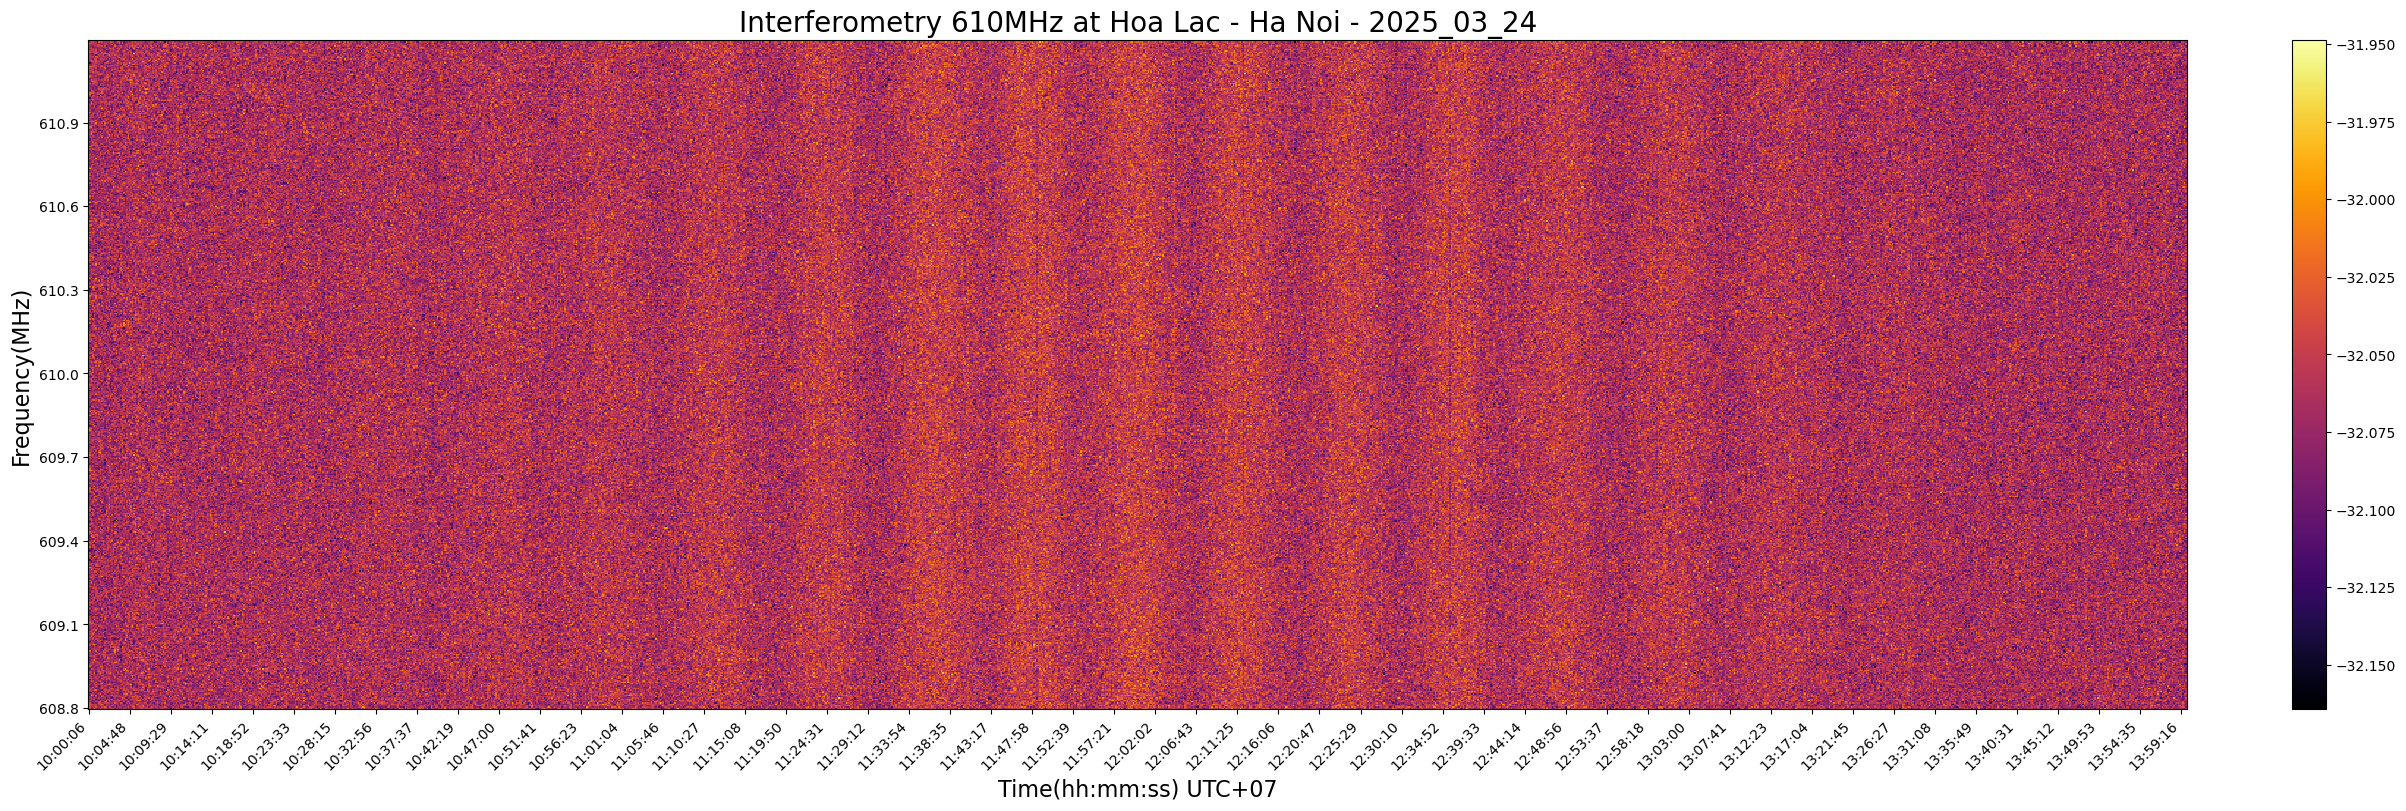

In [9]:
fig, ax_2 = plt.subplots(1, 1, figsize = [24, 8], layout = 'constrained')
ax_2.set_title(f'Interferometry 610MHz at Hoa Lac - Ha Noi - {data_date}', fontsize=20)
ax_2.set_xlabel('Time(hh:mm:ss) UTC+07', fontsize=16)
ax_2.set_ylabel('Frequency(MHz)', fontsize=16)
plt.imshow(data_matrix, cmap = 'inferno', interpolation = 'nearest', aspect = 'auto', origin = 'lower')
x = np.arange(0, len(time1_list))
plt.xticks(x[::len(time1_list)//50], time1_list[::len(time1_list)//50], rotation=45, ha='right')
y = np.arange(0, 512)
plt.yticks(y[::len(Frequency)//8], Frequency[::len(Frequency)//8], rotation=0, ha='right')
plt.colorbar()
plt.show()